# **Student Performance Analysis Across Socioeconomic Factors**

---



---



---



---



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Import dataset***

In [14]:
mat_df = pd.read_csv('/content/student-mat.csv', sep=';')
por_df = pd.read_csv('/content/student-por.csv', sep=';')

display(mat_df.head())
display(por_df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [13]:
print("Columns in mat_df:")
print(mat_df.columns)

print("\nColumns in por_df:")
print(por_df.columns)

Columns in mat_df:
Index(['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3'], dtype='object')

Columns in por_df:
Index(['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3'], dtype='object')


In [16]:
# Merge the two dataframes on common columns
common_columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
std = pd.merge(mat_df, por_df, how='inner', on=common_columns)

# Display the first few rows of the merged dataframe
display(std.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1_x,G2_x,G3_x,G1_y,G2_y,G3_y
0,GP,M,16,U,LE3,T,2,2,other,other,...,1,1,3,0,12,12,11,13,12,13
1,GP,M,15,U,GT3,A,2,2,other,other,...,1,1,3,0,14,16,16,14,14,15
2,GP,M,15,U,GT3,T,4,3,teacher,other,...,1,1,1,0,13,14,15,12,13,14
3,GP,M,15,U,GT3,T,4,4,health,health,...,1,1,5,0,12,15,15,11,12,12
4,GP,M,15,U,GT3,T,4,4,health,services,...,3,4,5,0,9,11,12,10,11,11


In [17]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      39 non-null     object
 1   sex         39 non-null     object
 2   age         39 non-null     int64 
 3   address     39 non-null     object
 4   famsize     39 non-null     object
 5   Pstatus     39 non-null     object
 6   Medu        39 non-null     int64 
 7   Fedu        39 non-null     int64 
 8   Mjob        39 non-null     object
 9   Fjob        39 non-null     object
 10  reason      39 non-null     object
 11  guardian    39 non-null     object
 12  traveltime  39 non-null     int64 
 13  studytime   39 non-null     int64 
 14  failures    39 non-null     int64 
 15  schoolsup   39 non-null     object
 16  famsup      39 non-null     object
 17  paid        39 non-null     object
 18  activities  39 non-null     object
 19  nursery     39 non-null     object
 20  higher      

In [19]:
std.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1_x,G2_x,G3_x,G1_y,G2_y,G3_y
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,16.282051,2.666667,2.487179,1.384615,1.974359,0.179487,4.230769,3.384615,2.743590,1.333333,2.102564,3.358974,2.205128,11.871795,12.076923,12.128205,12.282051,12.307692,12.589744
std,1.255487,1.242521,1.097168,0.673380,0.842527,0.555915,0.776685,0.877058,1.044231,0.621261,1.391608,1.441622,3.577558,3.628683,3.497252,4.181283,2.799894,2.514734,3.143230
min,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,5.000000,0.000000,5.000000,8.000000,0.000000
25%,15.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,9.000000,10.000000,10.000000,10.000000,10.500000,11.000000
50%,16.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,1.000000,3.000000,0.000000,12.000000,11.000000,12.000000,13.000000,12.000000,12.000000
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,3.000000,1.500000,3.000000,5.000000,4.000000,15.000000,15.000000,15.000000,13.500000,14.000000,15.000000
max,19.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,14.000000,19.000000,19.000000,19.000000,19.000000,18.000000,18.000000


In [21]:
# Check for null values in the merged dataframe
null_values_count = std.isnull().sum()

# Display the count of null values per column
print("Null values count per column:")
print(null_values_count)

Null values count per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1_x          0
G2_x          0
G3_x          0
G1_y          0
G2_y          0
G3_y          0
dtype: int64


In [23]:
# Find duplicate rows
duplicate_rows = std.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicate rows
std.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
duplicate_rows_after_removal = std.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_rows_after_removal}")

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [25]:
# Standardize text values in object columns
for col in std.select_dtypes(include='object').columns:
    std[col] = std[col].str.lower().str.strip()

# Display the first few rows to show the standardized text
display(std.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1_x,G2_x,G3_x,G1_y,G2_y,G3_y
0,gp,m,16,u,le3,t,2,2,other,other,...,1,1,3,0,12,12,11,13,12,13
1,gp,m,15,u,gt3,a,2,2,other,other,...,1,1,3,0,14,16,16,14,14,15
2,gp,m,15,u,gt3,t,4,3,teacher,other,...,1,1,1,0,13,14,15,12,13,14
3,gp,m,15,u,gt3,t,4,4,health,health,...,1,1,5,0,12,15,15,11,12,12
4,gp,m,15,u,gt3,t,4,4,health,services,...,3,4,5,0,9,11,12,10,11,11



Separate the columns into numerical and categorical types.


In [30]:
numerical_cols = std.select_dtypes(include=np.number).columns.tolist()
categorical_cols = std.select_dtypes(include='object').columns.tolist()

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y']

Categorical Columns:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


## Analyze numerical columns


Check for outliers or unusual distributions in numerical columns using descriptive statistics and visualizations.


Descriptive statistics for age:


,age
count,39.000000
mean,16.282051
std,1.255487
min,15.000000
25%,15.000000
50%,16.000000
75%,17.000000
max,19.000000


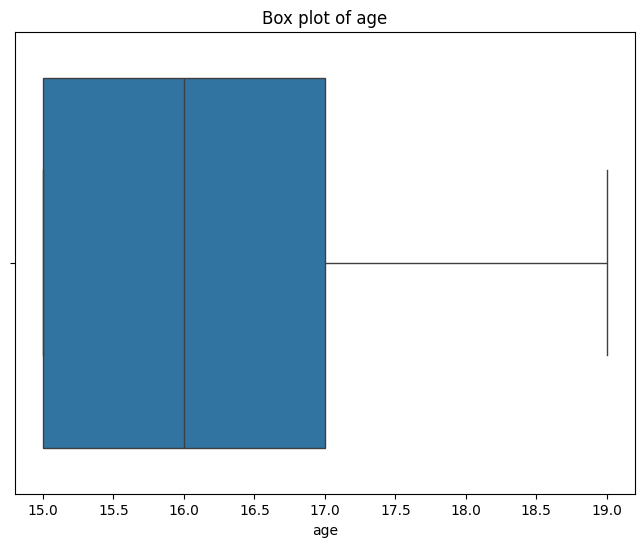

Descriptive statistics for Medu:


,Medu
count,39.000000
mean,2.666667
std,1.242521
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


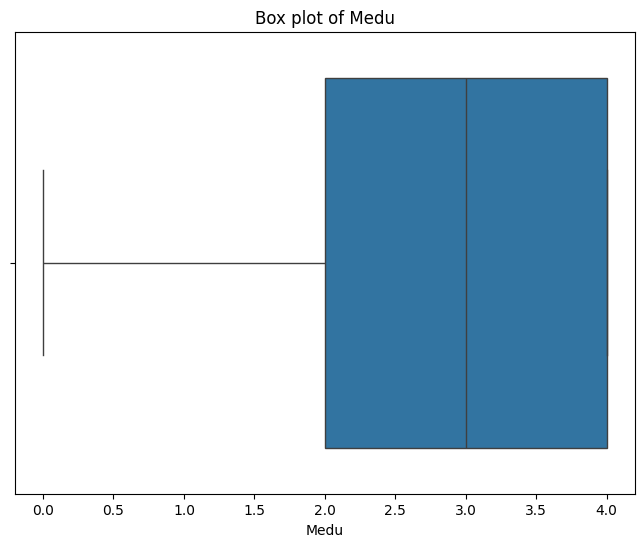

Descriptive statistics for Fedu:


,Fedu
count,39.000000
mean,2.487179
std,1.097168
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


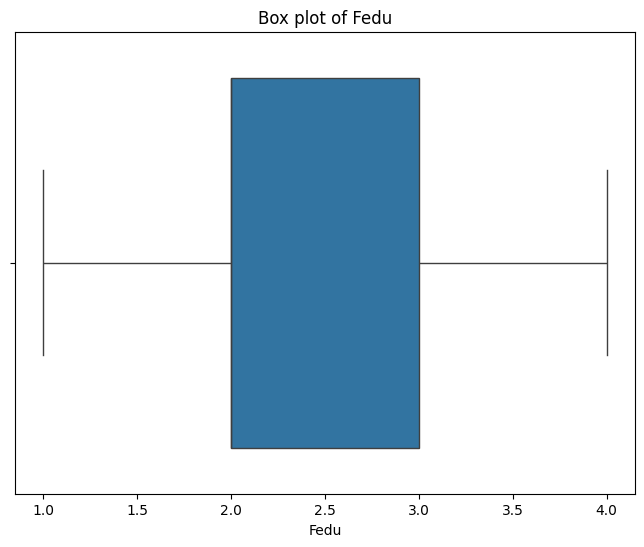

Descriptive statistics for traveltime:


,traveltime
count,39.000000
mean,1.384615
std,0.673380
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


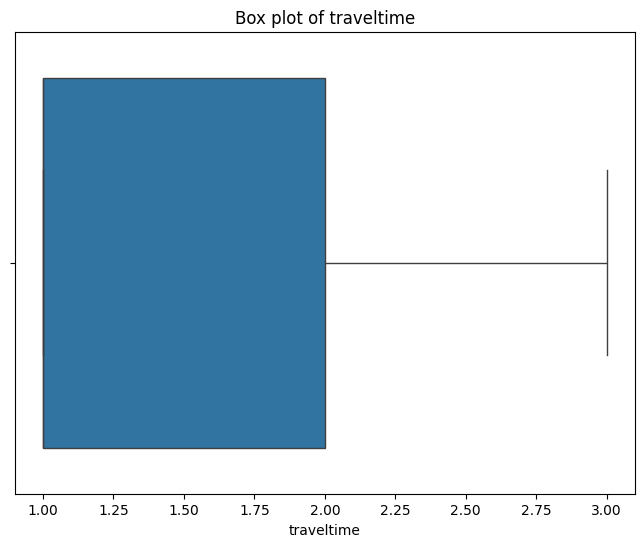

Descriptive statistics for studytime:


,studytime
count,39.000000
mean,1.974359
std,0.842527
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


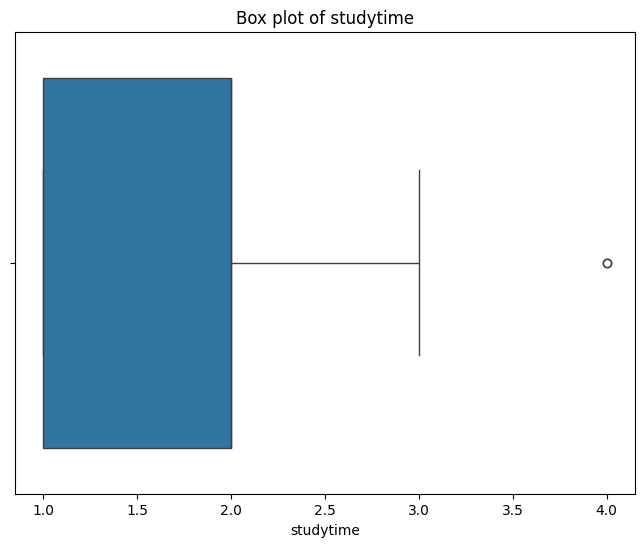

Descriptive statistics for failures:


,failures
count,39.000000
mean,0.179487
std,0.555915
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


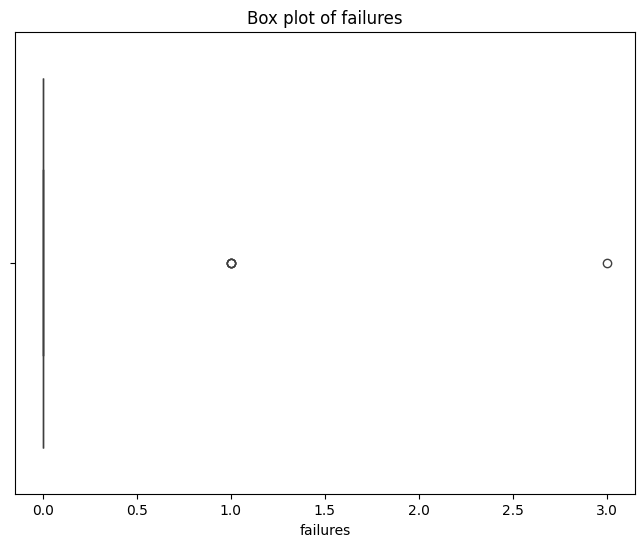

Descriptive statistics for famrel:


,famrel
count,39.000000
mean,4.230769
std,0.776685
min,2.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


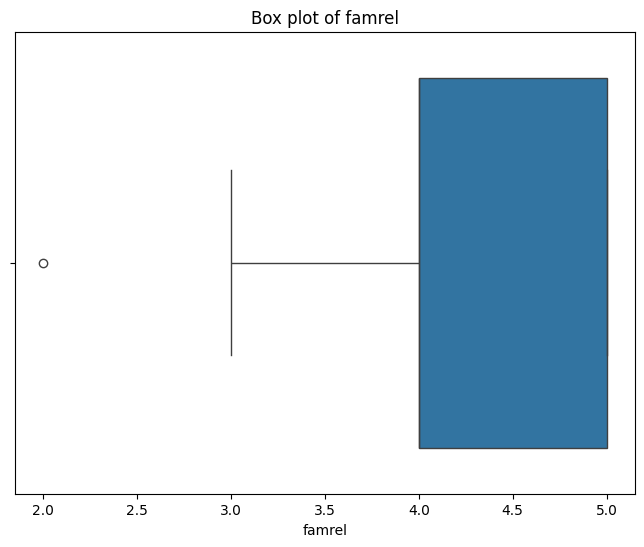

Descriptive statistics for freetime:


,freetime
count,39.000000
mean,3.384615
std,0.877058
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


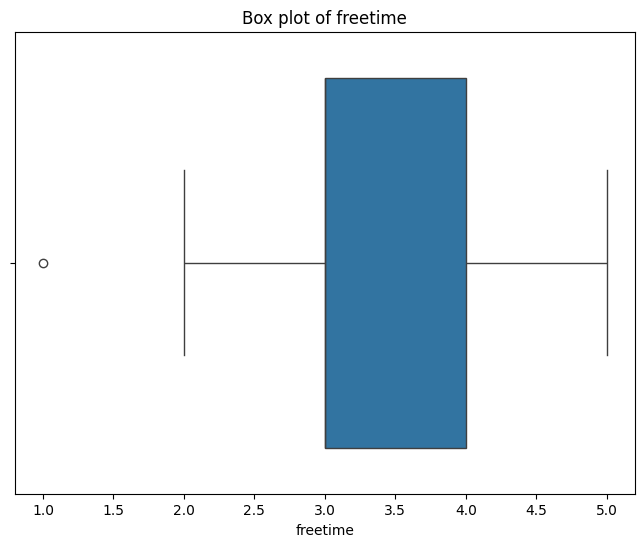

Descriptive statistics for goout:


,goout
count,39.000000
mean,2.743590
std,1.044231
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,5.000000


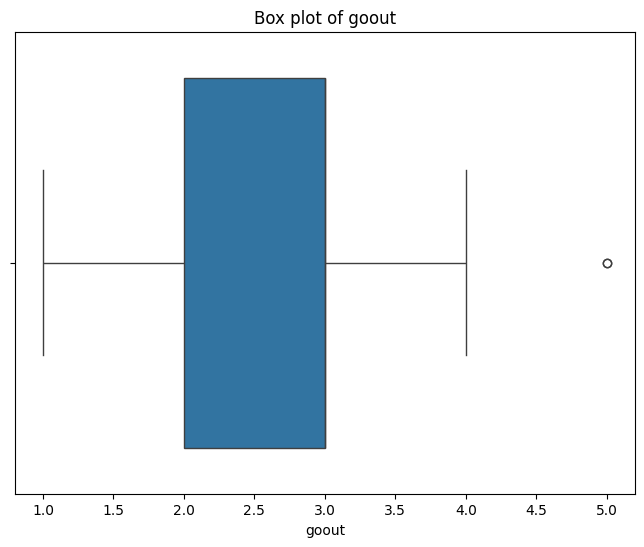

Descriptive statistics for Dalc:


,Dalc
count,39.000000
mean,1.333333
std,0.621261
min,1.000000
25%,1.000000
50%,1.000000
75%,1.500000
max,3.000000


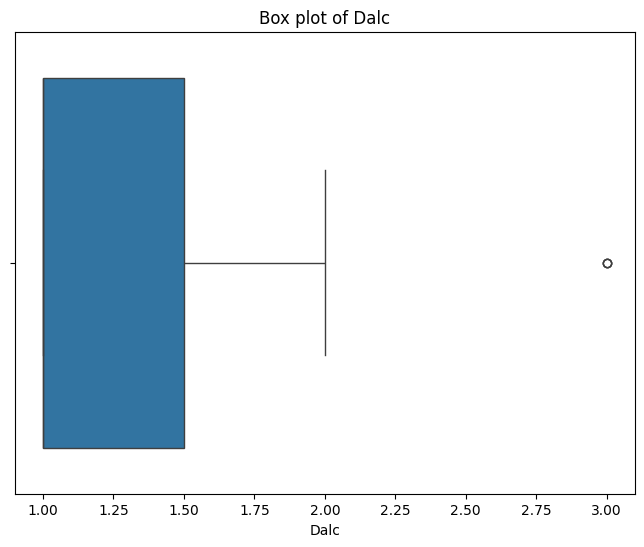

Descriptive statistics for Walc:


,Walc
count,39.000000
mean,2.102564
std,1.391608
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,5.000000


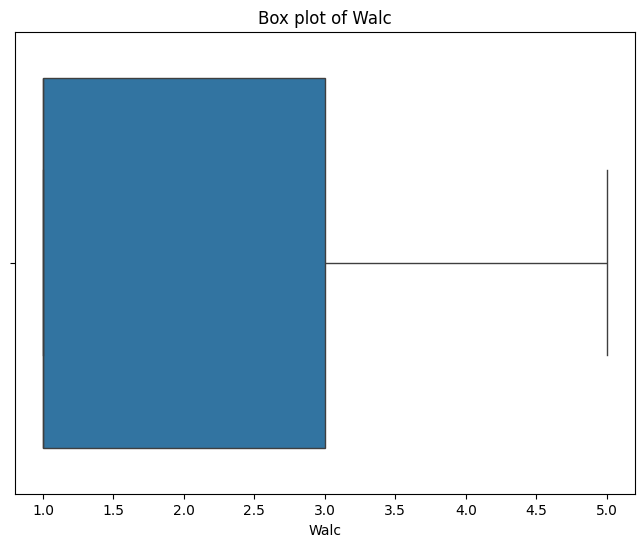

Descriptive statistics for health:


,health
count,39.000000
mean,3.358974
std,1.441622
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,5.000000


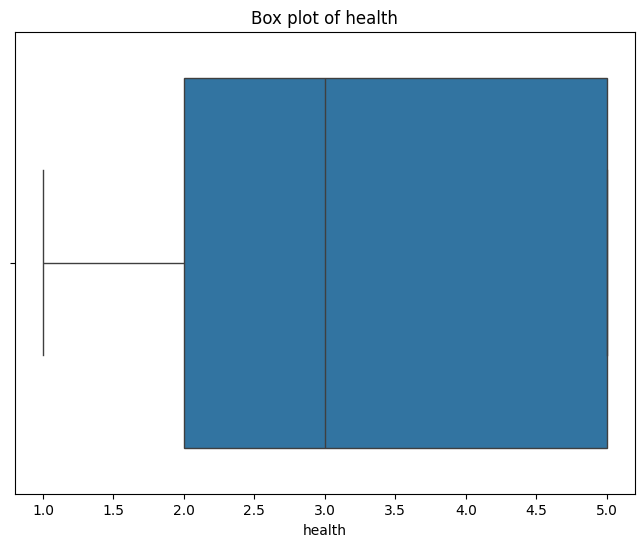

Descriptive statistics for absences:


,absences
count,39.000000
mean,2.205128
std,3.577558
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,14.000000


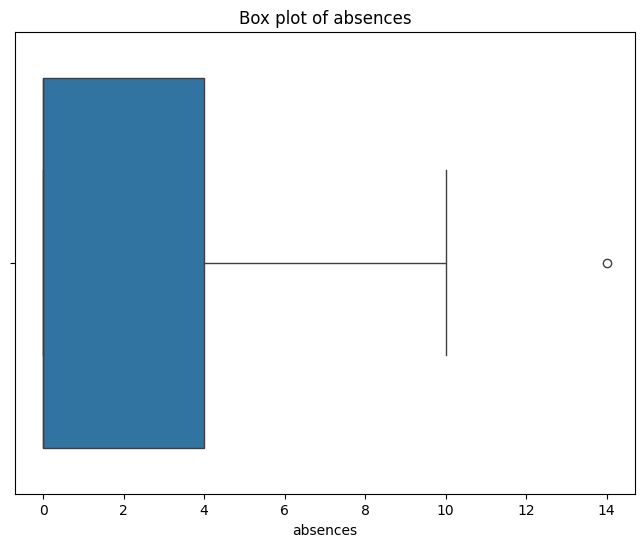

Descriptive statistics for G1_x:


,G1_x
count,39.000000
mean,11.871795
std,3.628683
min,6.000000
25%,9.000000
50%,12.000000
75%,15.000000
max,19.000000


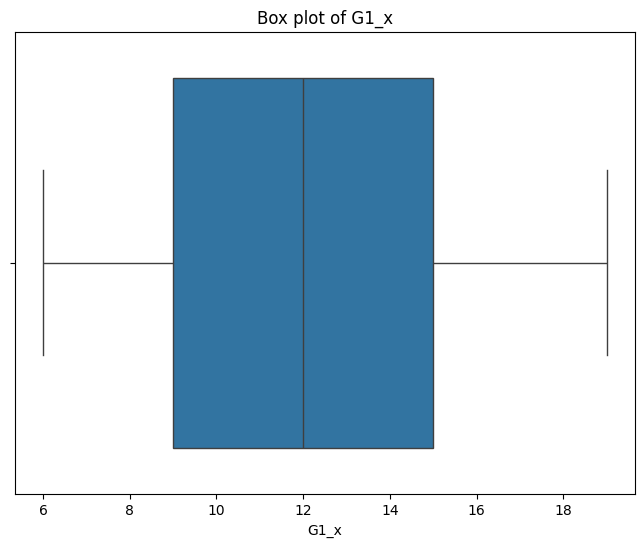

Descriptive statistics for G2_x:


,G2_x
count,39.000000
mean,12.076923
std,3.497252
min,5.000000
25%,10.000000
50%,11.000000
75%,15.000000
max,19.000000


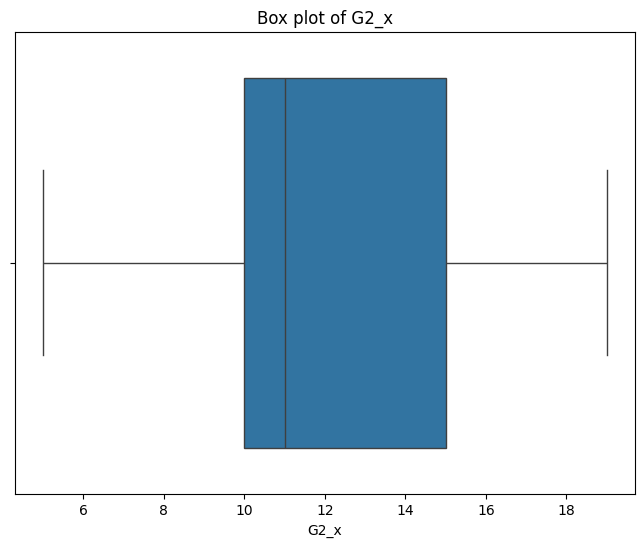

Descriptive statistics for G3_x:


,G3_x
count,39.000000
mean,12.128205
std,4.181283
min,0.000000
25%,10.000000
50%,12.000000
75%,15.000000
max,19.000000


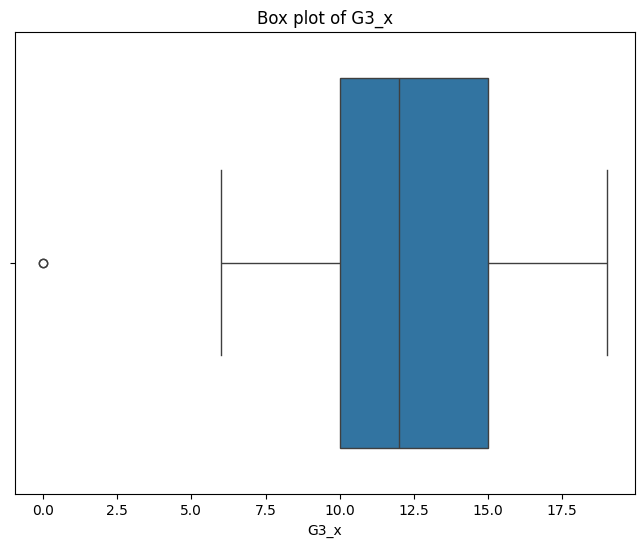

Descriptive statistics for G1_y:


,G1_y
count,39.000000
mean,12.282051
std,2.799894
min,5.000000
25%,10.000000
50%,13.000000
75%,13.500000
max,19.000000


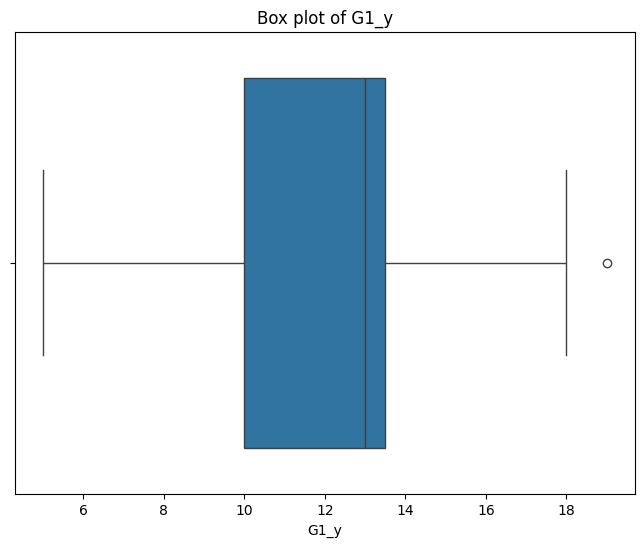

Descriptive statistics for G2_y:


,G2_y
count,39.000000
mean,12.307692
std,2.514734
min,8.000000
25%,10.500000
50%,12.000000
75%,14.000000
max,18.000000


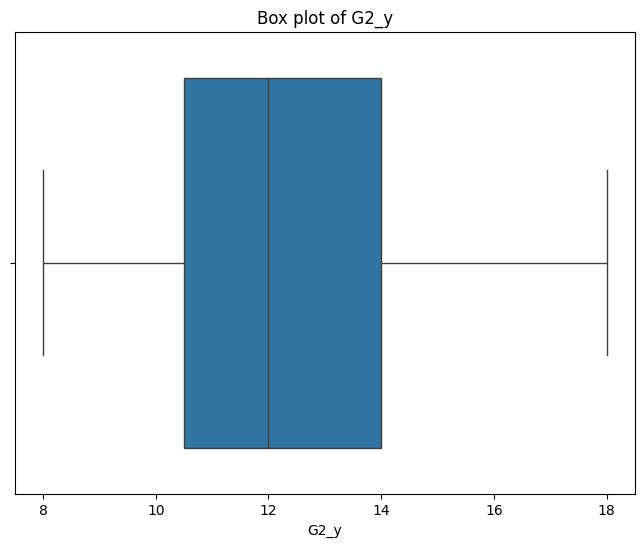

Descriptive statistics for G3_y:


,G3_y
count,39.000000
mean,12.589744
std,3.143230
min,0.000000
25%,11.000000
50%,12.000000
75%,15.000000
max,18.000000


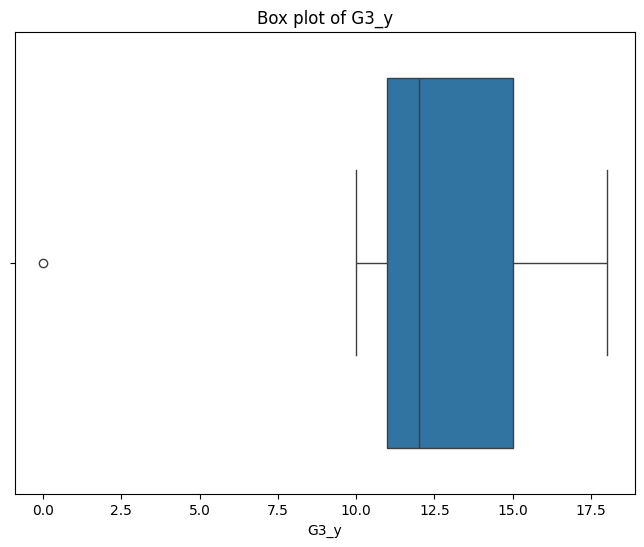

In [31]:
for col in numerical_cols:
    print(f"Descriptive statistics for {col}:")
    display(std[col].describe())

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=std[col])
    plt.title(f"Box plot of {col}")
    plt.show()

## Handle numerical outliers




In [32]:
# Identify columns with potential outliers based on previous analysis
outlier_cols = ['absences', 'failures', 'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y']

# Handle outliers in 'absences' and 'failures' by capping at the 95th percentile
for col in ['absences', 'failures']:
    upper_bound = std[col].quantile(0.95)
    std[col] = np.where(std[col] > upper_bound, upper_bound, std[col])
    print(f"Outliers in '{col}' capped at {upper_bound} (95th percentile).")

# Handle outliers in grade columns by capping at the valid range [0, 20]
grade_cols = ['G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y']
for col in grade_cols:
    std[col] = np.where(std[col] < 0, 0, std[col])
    std[col] = np.where(std[col] > 20, 20, std[col])
    print(f"Outliers in '{col}' capped at [0, 20].")

# Display descriptive statistics after outlier handling to verify
display(std[outlier_cols].describe())

Outliers in 'absences' capped at 10.0 (95th percentile).
Outliers in 'failures' capped at 1.0 (95th percentile).
Outliers in 'G1_x' capped at [0, 20].
Outliers in 'G2_x' capped at [0, 20].
Outliers in 'G3_x' capped at [0, 20].
Outliers in 'G1_y' capped at [0, 20].
Outliers in 'G2_y' capped at [0, 20].
Outliers in 'G3_y' capped at [0, 20].


,absences,failures,G1_x,G2_x,G3_x,G1_y,G2_y,G3_y
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,2.102564,0.128205,11.871795,12.076923,12.128205,12.282051,12.307692,12.589744
std,3.275064,0.338688,3.628683,3.497252,4.181283,2.799894,2.514734,3.143230
min,0.000000,0.000000,6.000000,5.000000,0.000000,5.000000,8.000000,0.000000
25%,0.000000,0.000000,9.000000,10.000000,10.000000,10.000000,10.500000,11.000000
50%,0.000000,0.000000,12.000000,11.000000,12.000000,13.000000,12.000000,12.000000
75%,4.000000,0.000000,15.000000,15.000000,15.000000,13.500000,14.000000,15.000000
max,10.000000,1.000000,19.000000,19.000000,19.000000,19.000000,18.000000,18.000000


## Analyze categorical columns


Check for inconsistent or rare categories in categorical columns.


In [34]:
for col in categorical_cols:
    print(f"Value counts for column: {col}")
    display(std[col].value_counts())
    print("\n")

Value counts for column: school


,count
school,
gp,32
ms,7




Value counts for column: sex


,count
sex,
f,20
m,19




Value counts for column: address


,count
address,
u,31
r,8




Value counts for column: famsize


,count
famsize,
gt3,26
le3,13




Value counts for column: Pstatus


,count
Pstatus,
t,36
a,3




Value counts for column: Mjob


,count
Mjob,
other,19
at_home,6
services,6
teacher,5
health,3




Value counts for column: Fjob


,count
Fjob,
other,19
services,11
at_home,4
teacher,3
health,2




Value counts for column: reason


,count
reason,
course,16
home,13
reputation,7
other,3




Value counts for column: guardian


,count
guardian,
mother,21
father,14
other,4




Value counts for column: schoolsup


,count
schoolsup,
no,33
yes,6




Value counts for column: famsup


,count
famsup,
no,23
yes,16




Value counts for column: paid


,count
paid,
no,37
yes,2




Value counts for column: activities


,count
activities,
no,21
yes,18




Value counts for column: nursery


,count
nursery,
yes,30
no,9




Value counts for column: higher


,count
higher,
yes,39




Value counts for column: internet


,count
internet,
yes,29
no,10




Value counts for column: romantic


,count
romantic,
no,28
yes,11
